# Python Workshop Final Project: An Introduction to Random Walks

**My contact info:** <br/>
Will Cerny <br/>
willcerny@gmail.com
(For code help, use the Slack!)



In this project notebook, you will learn how the basics of Random Walks, and how to implement them in Python from scratch. Then, you will us them in various applications (both mathematical and physical). 

**Requirements/Deliverables for Certificate, as determined by the Physics Department:**
1. Completion of the tasks laid out in the notebook below. 
2. Submission of your code in notebook form with your own implementations of these tasks.
3. An accompanying 4-5 page report to go with it (length excludes code+references but includes figures showing results from each part that asks for one = 4+ total figures).

Note that I specify which type of figure to provide for parts 2-3-4. Your report is mainly about these results, so you can (and certainly should) describe what's going on in each one!


These will be submitted to me at the email address given at the top of this notebook. Everything will be evaluated as "Pass/Fail" based on completion of *all* the tasks below and the report above. The recommended due date is 
March 11 (Friday before reading weekend), but we will allow submissions as late as 5pm on Friday, March 18th (last day of the quarter = during finals week). We suggest making progress before the recommended deadline, because the instructors will likely not be able to help as much during finals weeek due to exams of our own.

## Part 0: A Conceptual Introduction to Random Walks

According to the ever-reliable Wikipedia, a random walk is a "**random process that describes a path that consists of a succession of random steps on some mathematical space."**

Typically, we make the assumption that each step is independent of those which came before it, except for the immediate preceding step. This type of discrete step random walk approach has lots of applications: it describes collisional particles, the movements of stock prices after individual trades, the movement of some bacteria, etc. More advanced forms of random walks are also used for solving optimization problems: for example, Markov Chain Monte Carlo (MCMC) sampling - which is used very often in the physical sciences - is ultimately a form of random walk.

## Part 1: A Simple 1D Random Walk with Loops

The first part of this project is relatively simple, but is very fundamental to everything else we do. We will first begin by writing a loop-based random walk code. The algorithm should look a bit like this:

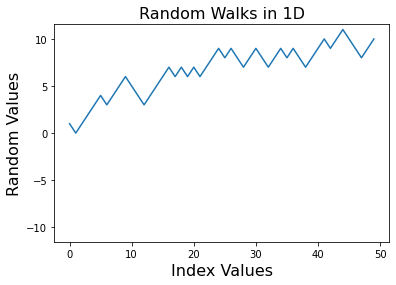

In [10]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd 

nStep = 50
stepLength = 1
points = randomWalk1D_NoLoop(nStep,stepLength)

index = np.arange(nStep)
plt.plot(index, points)

plt.xlabel("Index Values",fontsize = 16) 
plt.ylabel("Random Values",fontsize = 16)
plt.title("Random Walks in 1D",fontsize = 16)

low, high = plt.ylim()
bound = max(abs(low), abs(high))
plt.ylim(-bound, bound)

plt.show()

In [11]:
def randomWalk1D_WithLoop(nStep, stepLength):
    
    walk1D = np.zeros(nStep)
    
    for i in range(0, nStep-1):
        direction = np.random.rand()
        if direction >= 0.5:
            walk1D[i+1] = stepLength + walk1D[i]
        else:
            walk1D[i+1] = walk1D[i] -stepLength   
        
    return (walk1D)
    
    '''
    Arguments
    ---------------
    nstep: Number of Steps
    steplength = Length of Step
    
    A function which simulates a 1D random walk for a certain number of steps, and for a certain step length.
    
    Returns
    ---------------
    Array of length nstep which has the particle's position for each step.
    
    '''
    
    

## Part 2: A Simple 1D Random Walk *without* Loops

The above method, when implemented, is nice, but lacks computational efficiency. It will be come really slow as nsteps grows large, since you have to loop through a long array of numbers. This can be avoided by **precomputing** the (signed) step direction/length for the entire list of steps you will take, and then simply taking the cumulative sum of these numbers. 

It turns out that these two steps (precomputing steps + cumulative summation) are very similar in numpy. The corresponding functions are np.random.rand() and np.cumsum() -- you'll need to look up the arguments for each of these via Google. With these in hand, it should be quite fast to generate a n-length random walk!

In [12]:
def randomWalk1D_NoLoop(nStep, stepLength):
    
    arr = np.random.choice([-stepLength,stepLength], size = (nStep))
    return np.cumsum(arr)
    '''
    Arguments
    ---------------
    nstep: Number of Steps
    steplength = Length of Step
    
    A function which simulates a 1D random walk for a certain number of steps, and for a certain step length.
    
    
    '''

### Deliverable for Report

Include a plot -- created with matplotlib -- of your random walk using the function you define here in part 2. Use a step length of 5 and 1000 steps. Be sure to give your plot a title and axes labels! Also, set your y-axs limits to be symmetric about 0.

## Part 3: Estimating the value of pi using an Ensemble of Random Walks with varying nstep across walks

### Task Description

It turns out that it is possible to show that the distance travelled by a particle undergoing a 1D random walk is, on average,

$$ d_{\rm avg} = \sqrt{\frac{2n}{\pi}}$$

This means that so long as we can run random walks for n steps and recording their distance from the origin, we should have a direct estimate of the value of $\pi$. Since we can run lots of random walks, varying n each time, we can record lots of values for d for *independent* random walks of length n. This way, this turns out to be a linear regression problem, and you know that the slope will be related to pi!

The goal will be to estimate the value of pi using the 1D random walk code you wrote for part b. You will collect data across many runs of random walk with different step lengths n, and compute the final distance d. Then you will use the numpy linear regression function (see Lecture 6) to get a slope estimate, which you can relate to the value of pi.

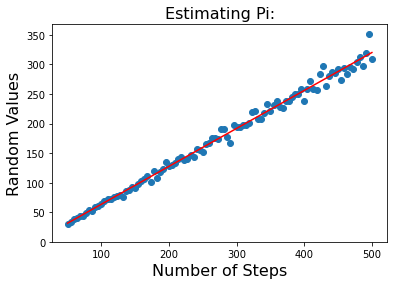

Estimate of Pi: 3.117132251874283
Actual Value of Pi:  3.141592653589793
Percent Error: 0.7847084993%


In [18]:
from scipy.stats import linregress
import math

stepLength = 1
start = 50
end = 500
interval = 10
numberStepsPerWalk = 1000

diffSteps = np.linspace(50,500,100)
d_avg = []
for i in diffSteps:
    d_list = []
    for j in range(0,numberStepsPerWalk):
        d = randomWalk1D_NoLoop(int(i), stepLength)
        d_list.append(d[(int(i-1))])  
    d_avg.append(np.average(np.absolute(d_list)))

index = np.arange(end -1)
plt.scatter(diffSteps,np.square(d_avg))

plt.xlabel("Number of Steps",fontsize = 16) 
plt.ylabel("Random Values",fontsize = 16)
plt.title("Estimating Pi:",fontsize = 16)

low, high = plt.ylim()
bound = max(abs(low), abs(high))
plt.ylim(0, bound)

#linear regression
L = linregress(x = diffSteps, y = np.square(d_avg))
plt.plot(diffSteps, diffSteps * L.slope + L.intercept, color = 'red')
plt.show()
# The linear regression slope is D(avg)^2 / n, which equals 2/pi
print("Estimate of Pi:", (2/ L.slope))
print("Actual Value of Pi: ", np.pi)
print("Percent Error: {:.10f}%".format(abs(((2/ L.slope) - np.pi) / (2/ L.slope))*100))


### 

### Deliverable for Report

Generate a figure showing your data collection across your random walk iterations, and the corresponding slope fit. Be sure to label your axes, and include the slope and intercept of your relation somewhere. In the text of your report, be sure to discuss the precision of your estimate (e.g, calculate percent error)!

## Part 4: 1D Particle Diffusion / Brownian Motion: Probability Distributions for an Ensemble of Random Walks with fixed nstep for all walks

In this part, we consider a particle undergoing diffusion. Please read [this page](https://www.compadre.org/nexusph/course/Diffusion_and_random_walks) to learn about why diffusion of gas molecules is a process that is described by a random walk. (my formulas below are slightly different here, so just note that fact). This is exactly the type of thing to include in your report. Recapping the math involved, we can model a diffusive particle's random walk through two main parameters:

 $$ \lambda =v_0 \Delta t = \text{ the "mean free path," and } $$ $$ D = \frac{\lambda^2}{2 \Delta t}  = \text{ the diffusion constant}$$
, .

Now, as the previous part has shown, we know that the average displacement that an ensemble of particles end up at after a random walk is some amount $d_{\rm avg}$. We can actually say more than just this: we can also estimate the probability that an individual walker ends up at some distance $d$. As noted in the link above,
$$ P(d) = \frac{1}{\sqrt{4 \pi  D  t}} e^{-\big(\frac{d^2}{4 D t}\big)} $$

We can reproduce this distribution empirically by running many walks of the same nstep and plotting a histogram of their resulting distribution.

### Task Description 

Your goal is to show that this is true. To do so, again adapt code you have already written in this notebook for running an ensemble of walks, but make it into a function that can includes an argument for $v_0$. Then, write a separate function which plots the results of this function, and overplots the theoretical prediction for P(d) given in the formula above. You can assume that $\Delta t = 1$ such that t = nstep; this therefore means that the step length ($\lambda$) is just equal to $v_0$.  The functions you write should take the following skeletons:

In [14]:
def run_ensemble(nStep, v0):
    '''
    Arguments:
    nstep: number of steps per walk
    v0: a velocity constant which sets the scale of each step.
    
    A function which runs an ensemble of walks, each of length nstep. 
    
    Returns: 
    An array of the final displacements (d)
    '''
    finalDis = []
    for i in range(0,nStep):
        d = randomWalk1D_NoLoop(nStep, v0)
        finalDis.append(d[-1])

    return finalDis
    

In [15]:
def plot_ensemble(dis, nStep, v0):
    '''
    Arguments:
    displacements: the output from the first function.
    v0: a velocity constant which sets the scale of each step. Needed for plotting theory P(d)
    nstep: again only needed for plotting theoretical P(d)
    
    Create a single figure. In that figure, plot a (matplotlib) histogram of displacements d,
    and then overplot the predicted value p(D) using plt.plot(); see hint below..
    
    Returns: 
    Nothing formally, but this function should generate a plot.
    '''
    std1 = np.std(dis)
    
    plt.hist(dis,density=True, bins = 30, label = "Trials std : "+ str(std1))
    
    x = np.linspace(-nStep/3,nStep/3,nStep*3)
    
    y = (1/np.sqrt(4*np.pi *(v0**2/2) *nStep)) * (np.exp(-(np.square(x)/(4 * (v0**2/2) *nStep))))
    
    std_formula = np.sqrt(2* (v0**2/2)*nStep)   
    
    plt.plot(x,y, lw = 3, label = "Predicted: " + str(std_formula))
    plt.xlabel("Termination Point of Walk (distance)")
    plt.ylabel("Probabilitiy")
    plt.title("Distance vs. Probability")
    plt.legend()
    plt.show()
    print("Percent Error: {:.10f}%".format(abs((std1 - std_formula) / std1)*100))

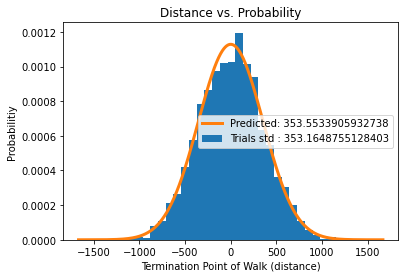

Percent Error: -0.0011000955%


In [27]:
import matplotlib.pyplot as plt
import math

nStep = 5000
v0 = 5
dis = run_ensemble(nStep, v0)
plot_ensemble(dis, nStep, v0)

Hint: for plotting the theory, remember that you can use np.linspace() to generate a grid of d values and simply apply mathematical operations to it to get it into the form P(d). In the call to the matplotlib histogram function, use the "density = True" argument to normalize the histogram of your samples so that they agree.

Lastly, to check your work, use the numpy standard deviation function on your ensemble of final displacements $d$, and check that this value agrees with the theoretical prediction that the spread should be:
$$ \sigma = \sqrt{2Dt} $$

Please use a value of $v_0 = 5$ for running your function to generate these plots and for checking with the formula above. I recommend setting nEnsembles = 5000 and nstep = 5000 at minimum to get a good result.

### Deliverables for Report

Include the plot showing the Gaussian P(d) overlaid over the histogram of distances $d$. Again, remember axes labels and a title. Also demonstrate in the text that you were able to recover the value of $\sigma$ predicted by the expresson given above.

## Part 5: Choose your own further application!

As noted at the workshop session where we pitched this project, we want you to explore a topic of your own interest here. Reach out to Will when you reach this point and we can talk through a plan! 

In [16]:
def randomWalk2D(nStep, stepLength):
    '''
    Arguments: number of steps as nStep and length of each step as steplength
    
    Creates the array of random walks to be called by the main program. Note that for simplicity we restrict 
    the walk movements to the x and y axis only, rather than the set of points on the unit of circle. However,
    it can be generalized for a more accurate random walk. 

    Returns two random walks for the x and y coordinates, respectively. 

    '''
    directionX = np.random.choice([-stepLength, 0,stepLength], size = nStep)
    directionY = np.random.choice([-stepLength, 0, stepLength], size = nStep)

    for i in range(0, nStep):
        if (directionX[i] == 0 ) and (directionY[i] ==0):
            dir = np.random.rand()
            if dir >= 0.5:
                directionX[i] = np.random.choice([-stepLength, stepLength])
            else:
                directionY[i] = np.random.choice([-stepLength, stepLength])
       
    walk2Dx= np.cumsum(directionX)
    walk2Dy = np.cumsum(directionY)
       
    return walk2Dx, walk2Dy

StdX: 302.50040433691987 , StdY: 300.5306936587343
Std for 2D: 426.40965333233254
Predicted: 500.0


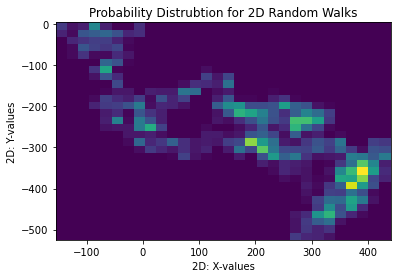

In [17]:
import matplotlib.pyplot as plt
nStep = 5000
stepLength = 5

finalX, finalY = []
for i in range(0,nStep):    
    x,y = randomWalk2D(nStep, stepLength)
    finalX.append(x[-1])
    finalY.append(y[-1])

xlow, xhigh = plt.xlim()
ylow, yhigh = plt.ylim()
boundx = max(abs(xlow), abs(xhigh))
boundy = max(abs(ylow), abs(yhigh))
plt.xlim(-boundx, boundx)
plt.ylim(-boundy, boundy)

stdx = np.std(finalX)
stdy = np.std(finalY)
plt.hist2d(x,y, bins = (30,30), density = True)

print("StdX: " + str(stdx), ", StdY: " + str(stdy))
print("Std for 2D: " + str(np.sqrt(stdx**2 + stdy **2)))
std_formula = np.sqrt(4 *((stepLength**2) / 2)* nStep)
print("Predicted: " +str(std_formula))
plt.xlabel("2D: X-values")
plt.ylabel("2D: Y-values")
plt.title("Probability Distrubtion for 2D Random Walks")
plt.show()
print("Percent Error: {:.10f}%".format(abs((std1 - std_formula) / std1)) * 100)